In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df= pd.read_csv('salary_class.csv')

In [4]:
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


## class를 예측하는 ML 모델링을 만들기
- class 별 데이터의 분포가 궁금하다
- 0과 1의 클래스 차이에 따른 다른 데이터의 분포나 기초통계량 등이 궁금할 수 있다  
  
  
### 결측치
- 데이터 타입에 대한 정보
- 최소한의 기초통계
- 전체 데이터의 퀄리티 등을 확인해야 한다

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       46043 non-null  object
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [6]:
df.isna().sum()

Unnamed: 0           0
age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [7]:
# 결측치에 대한 확인
df['workclass'].value_counts()

# 결측치는 채워야 한다
## drop보다 채우는 게 좋다

# 결측치 대체 이유
# 결측치 발생 이유에 대해 고민해야 한다
# 결측치를 다른 값으로 채워도 되는 건가
# 데이터의 로직을 꼭 고민해야 한다

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [8]:
df.describe(include='all')
# include='all' -> 수치형, 문자형 모두 포함
# 수치형 변수도 연속형, 순서형
# 두개의 차이를 이해하고 접근
# 데이터에 대한 로직을 기반으로 꼭 접근해야 한다

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842.000000
unique,NaN,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,NaN
mean,24420.500000,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,0.239282
std,14099.615261,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,0.426649
min,0.000000,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,12210.250000,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,24420.500000,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,36630.750000,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [9]:
df.shape

(48842, 15)

## 원하는 데이터 타입에 따른 컬럼을 추출할 수 있다

In [36]:
# int, float, object, timestamp 등등
# 해당 컬럼의 데이터 타입만 추출할 수 있다
int_list = []
for i in df.columns:
    if df[i].dtype =='int64':  #수치형 데이터
        int_list.append(i)

In [37]:
int_list

['Unnamed: 0',
 'age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'class']

In [34]:
# 수치형 컬럼만 추출
df[int_list]

,Unnamed: 0,age,education-num,capital-gain,capital-loss,hours-per-week,class
0,0,25,7,0,0,40,0
1,1,38,9,0,0,50,0
2,2,28,12,0,0,40,1
3,3,44,10,7688,0,40,1
4,4,18,10,0,0,30,0
...,...,...,...,...,...,...,...
48837,48837,27,12,0,0,38,0
48838,48838,40,9,0,0,40,1
48839,48839,58,9,0,0,40,0
48840,48840,22,9,0,0,20,0


In [38]:
obj_list = []
for i in df.columns:
    if df[i].dtype =='object':  #문자형 데이터
        obj_list.append(i)

In [39]:
#문자형 컬럼만 추출
df[obj_list]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [42]:
df_int=df[int_list]
df_ob=df[obj_list]

## EDA 작업들
- unique한 값들
- 해당 변수에 대해서
- race
- 최대한 특성들을 고려해서 알려주는 게 가장 좋다
- 과적합 또는 차원이 많아지면 흔히 말하는 차원의 저주가 발생할 수 있다.(컬럼이 너무 많아지는 경우 등)
- 전처리하는 과정에서 다른 변수들과 시각화를 통해 다양한 인사이트를 정리해야 한다
- 흔히 말하는 시각화 및 전처리 하기 위해서는 결국 우리 목적은 0,1 분류하는 것
- 0과 1의 분류에 대한 인사이트를 기반으로 데이터에 대한 시각화 및 전처리를 진행 필수!
- 전처리를 하고 난 후에 평가 -> 모델링을 통한 평가 지표로 확인
- 결과가 잘 나오지 않는다면 -> 개선을 해야한다
- 데이터를 더 넣거나 모델링을 수정하거나, 튜닝하거나 등등 -> 가장 중요한 건 다시 전처리 작업을 진행하는 것
---
- 베이스라인 모델링을 하는 이유가
- 베이스라인의 성능을 보고 내가 전처리를 통해 개선하고 있다는 것을 확인해야 한다.

In [41]:
print(df_ob.race.value_counts())
print('--------------------------')
print(df_ob.sex.value_counts())
print('--------------------------')
print(df_ob.education.value_counts())

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64
--------------------------
Male      32650
Female    16192
Name: sex, dtype: int64
--------------------------
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


In [43]:
df_int

,Unnamed: 0,age,education-num,capital-gain,capital-loss,hours-per-week,class
0,0,25,7,0,0,40,0
1,1,38,9,0,0,50,0
2,2,28,12,0,0,40,1
3,3,44,10,7688,0,40,1
4,4,18,10,0,0,30,0
...,...,...,...,...,...,...,...
48837,48837,27,12,0,0,38,0
48838,48838,40,9,0,0,40,1
48839,48839,58,9,0,0,40,0
48840,48840,22,9,0,0,20,0


In [44]:
np.sort(df_int['age'].unique())

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90], dtype=int64)

- 연령별 범주화도 만들 수 있다
- 연봉관련된 데이터, 연봉관련되어서 연령별로 시니어, 주니어 등
- 수치형 데이터를 전처리할 때 데이터에 한 로직을 필수적으로 알아야 한다.

In [47]:
np.sort(df_int['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [48]:
# education-num이 2인 df 데이터의 education 값
print(df[df['education-num']==2].education.value_counts())

1st-4th    247
Name: education, dtype: int64


- 컬럼들과의 관계를 잘 정리를 꼭 해야 한다.
- 컬럼 정의서를 다시 만들어야 한다
- 나만의 컬럼 정의서(내가 데이터 분석할 때 나만의 컬럼 정의서를 다시 구체화시켜야 한다)
- 단순하게 분포만 보는 게 아니라 시각화도 -> 통계적으로 수치를 확인하고
- 데이터에 대한 전반적인 것들을 탐색하고 모델링을 준비하는 과정

In [49]:
for i in np.sort(df['education-num'].unique()):
    print(i, df[df['education-num']==i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


### 컬럼이 이미 인코딩된 컬럼이라는 사실을 알 수 있다

<Axes: >

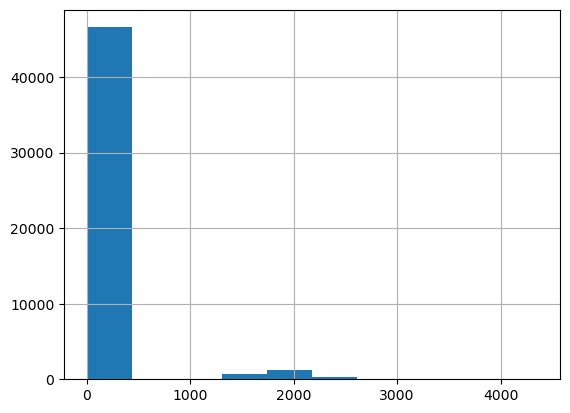

In [50]:
df['capital-loss'].hist()

<Axes: >

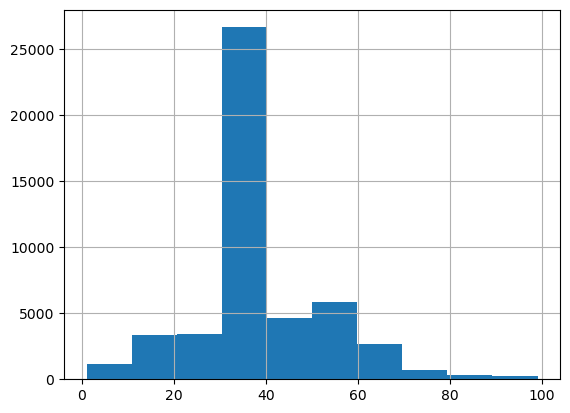

In [51]:
df['hours-per-week'].hist()

In [52]:
df_ob['native-country'].value_counts()
# 미국은 1, 나머지는 0이다 로 인코딩?
# 국가별로 인코딩?
# 대륙별로도 진행 가능

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [53]:
df_nc=df[['native-country','class']]

In [54]:
#class 에 대한 영향도를 확인해야 한다
df_nc.groupby('native-country').mean()
# 0과 1
# class 평균이 높으면 1에 대한 비중이 크다

,class
native-country,
Cambodia,0.321429
Canada,0.346154
China,0.295082
Columbia,0.047059
Cuba,0.246377
Dominican-Republic,0.048544
Ecuador,0.133333
El-Salvador,0.070968
England,0.370079


In [55]:
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
